In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

sns.set()
sns.set_palette(sns.color_palette('Set2', 12))
T = True
F = False

In [193]:
onn_postproc = lambda x: pd.Series( (x / x.sum()).tolist() + [0] if x.sum() >= 1 else x.tolist() + [1-x.sum()], 
                                   index=x.index.to_list()+['Unknown'])

f= 'data/ONN/PollutionSourceTracking-by-ONN.PMID-26445052.xlsx'
dfs = {sheet: pd.read_excel(f, sheet_name=sheet, index_col=0).sort_index().apply(onn_postproc, axis=1)
       for sheet in ['layer2', 'layer3', 'layer4', 'layer5', 'layer6']}
f= 'data/FEAST/PollutionSourceTracking.by-FEAST.allsource.xlsx'
dfs['feast'] = pd.read_excel(f, sheet_name='data', index_col=0).sort_index()
f = 'data/SourceTracker/PollutionSourceTracking.by-SourceTracker-allsource.csv'
dfs['sourcetracker'] = pd.read_csv(f, index_col=0).sort_index()

- Problems to be solved: add additional notation for repeated biomes

In [194]:
def cols_mapper(x):
    if x.endswith('Contaminated') or x.endswith('Sediment') or x.endswith('Nutrient') \
        or x.endswith('Photic_zone') or x.endswith('Permafrost'):
        return ':'.join(x.split('-')[-1:])+('({})'.format(x.split('-')[-2]))
        '''elif x.endswith('Dissolved_organics_(aerobic)'):
            return ':'.join(x.split('-')[-1:])+('({})'.format(x.split('-')[-3]))'''
    else:
        return ':'.join(x.split('-')[-1:])

topn_cols = lambda df, n: df[df.columns[df.sum().isin(df.sum().nlargest(n=n))]]
keep = lambda x: x

for name in dfs.keys():
    dfs[name] = topn_cols(dfs[name][ sorted(dfs[name].columns) ], n=5)
    others = dfs[name].apply(lambda x: 1 - x.sum(), axis=1).round(2).tolist()
    dfs[name].loc[:, 'Others'] = others
    dfs[name] = dfs[name].rename(columns=cols_mapper)

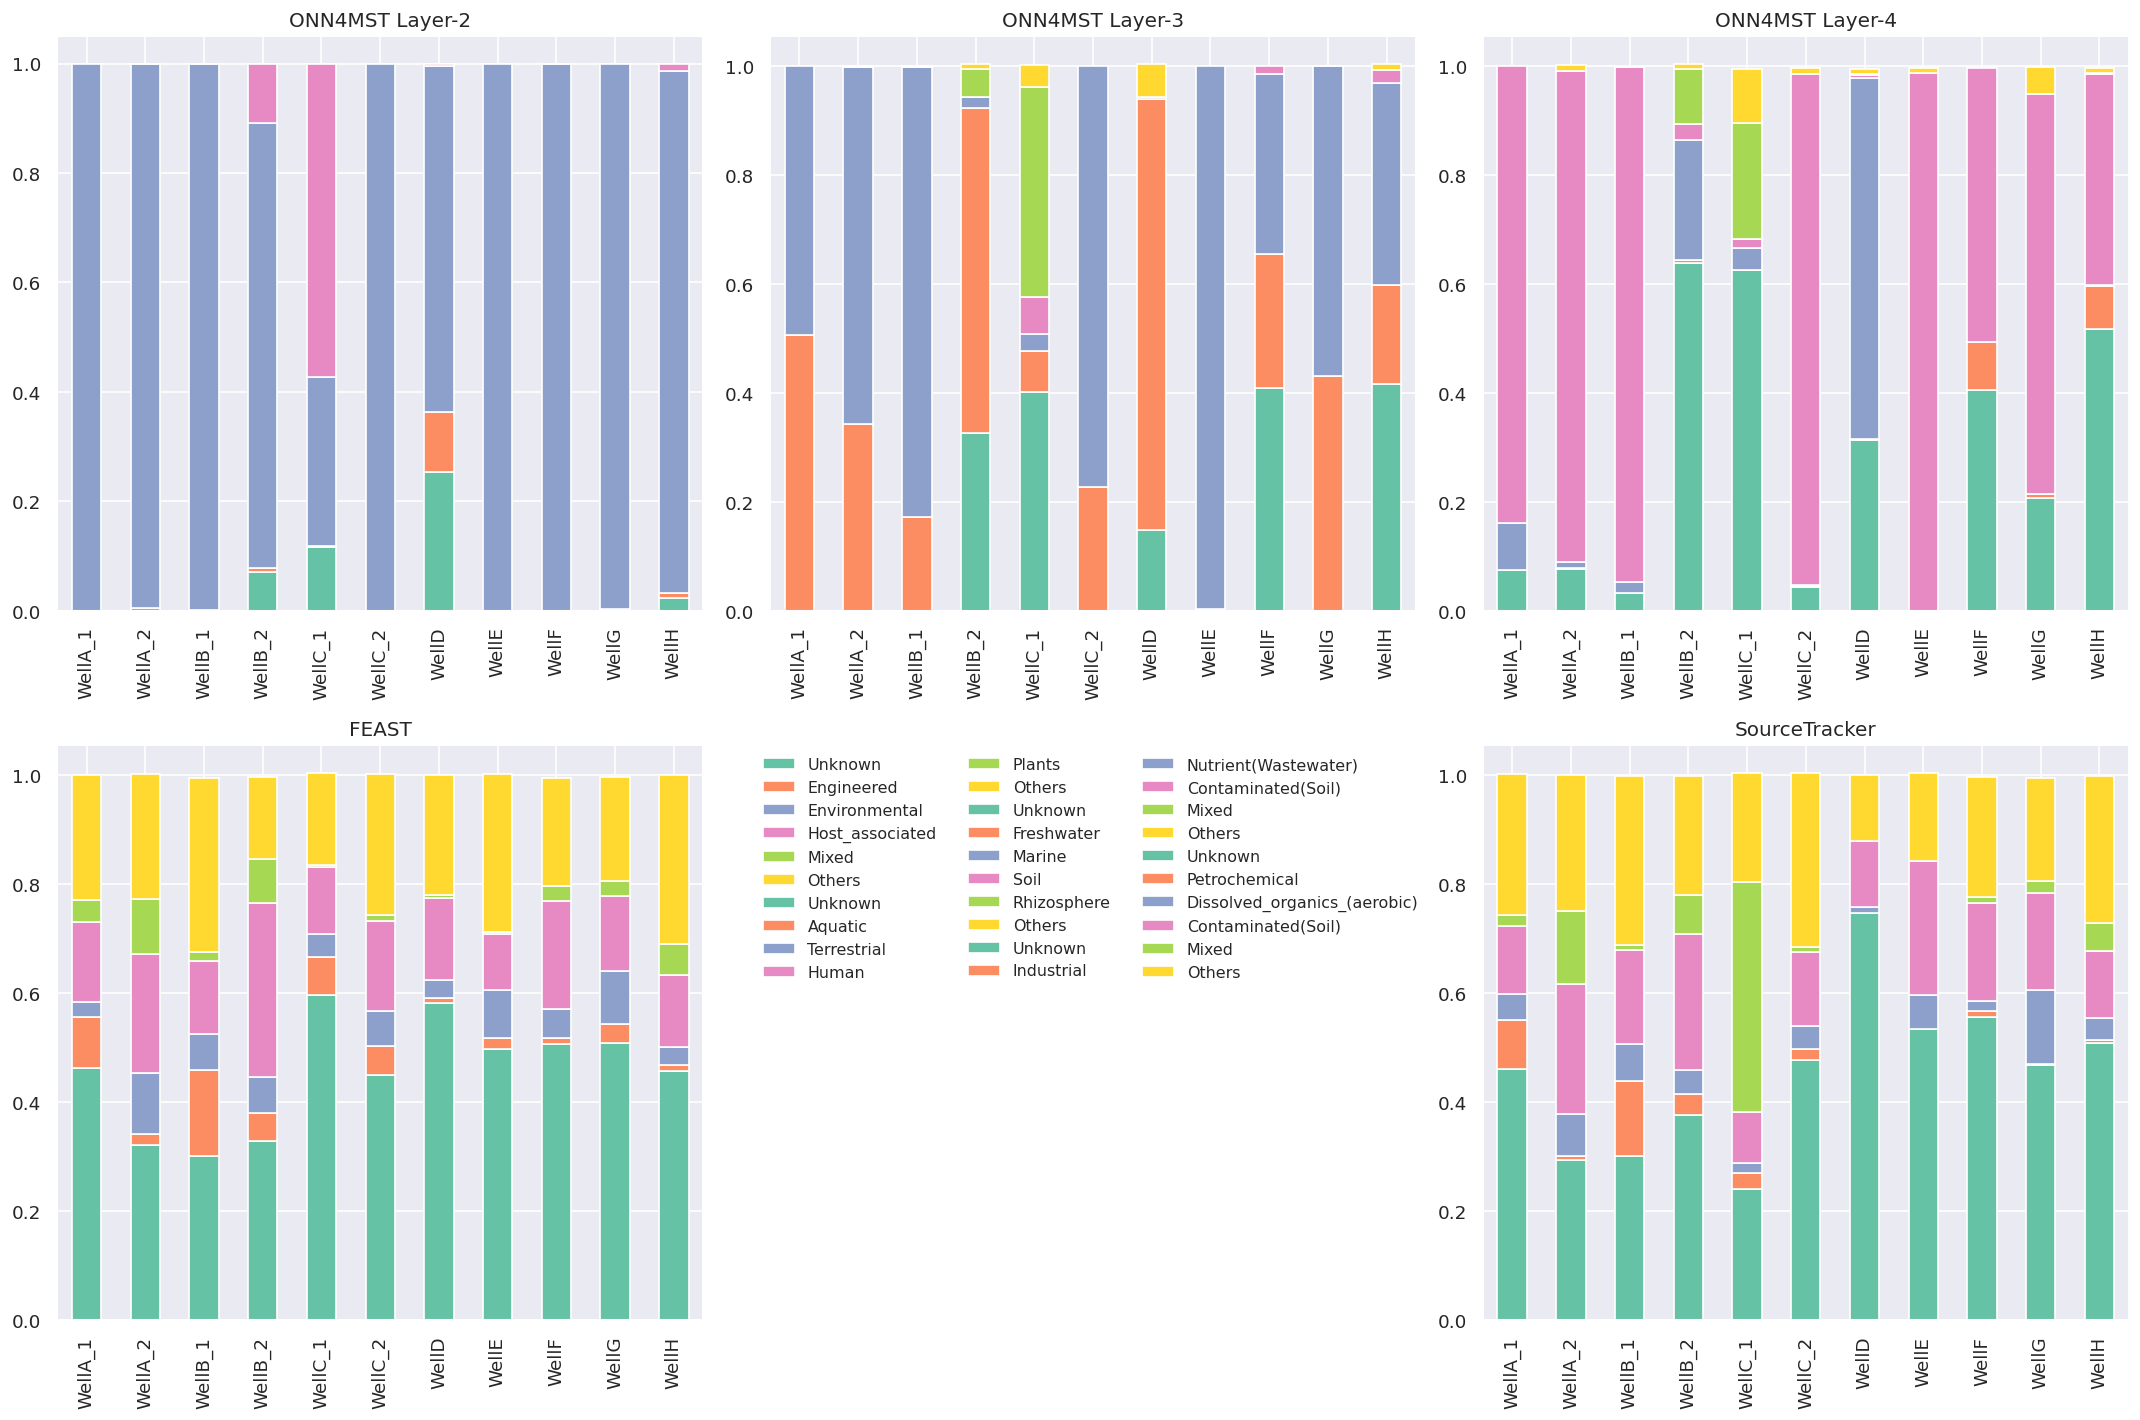

In [195]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, dpi=120, figsize=(18, 12))
handles, labels = ([], [])

dfs['layer2'].plot(kind='bar', stacked=T, legend=F, ax=ax1, title='ONN4MST Layer-2')
dfs['layer3'].plot(kind='bar', stacked=T, legend=F, ax=ax2, title='ONN4MST Layer-3')
dfs['layer4'].plot(kind='bar', stacked=T, legend=F, ax=ax3, title='ONN4MST Layer-4')
# For layer 5 and 6, see supplementary material
dfs['feast'].plot(kind='bar', stacked=T, legend=F, ax=ax4, title='FEAST')
ax5.grid(b=None); ax5.set_xticks([]); ax5.set_yticks([]); ax5.set_facecolor('white')
#ax5.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False)
dfs['sourcetracker'].plot(kind='bar', stacked=T, legend=F, ax=ax6, title='SourceTracker')
for ax in [ax1, ax2, ax3, ax4, ax5, ax6]: 
    ax.set(xlabel="", ylabel="")
    #ax.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1, fontsize=6.2)
    handles_labels = ax.get_legend_handles_labels()
    handles+= handles_labels[0] 
    labels+= handles_labels[1]
fig.legend(handles, labels, loc='upper center', ncol=3, fontsize=9.5, bbox_to_anchor=(0.505, 0.47), 
           facecolor='white', edgecolor='white')
plt.tight_layout()
plt.savefig('PollutionSourceTracking_main.pdf')
plt.savefig('PollutionSourceTracking_main.svg')

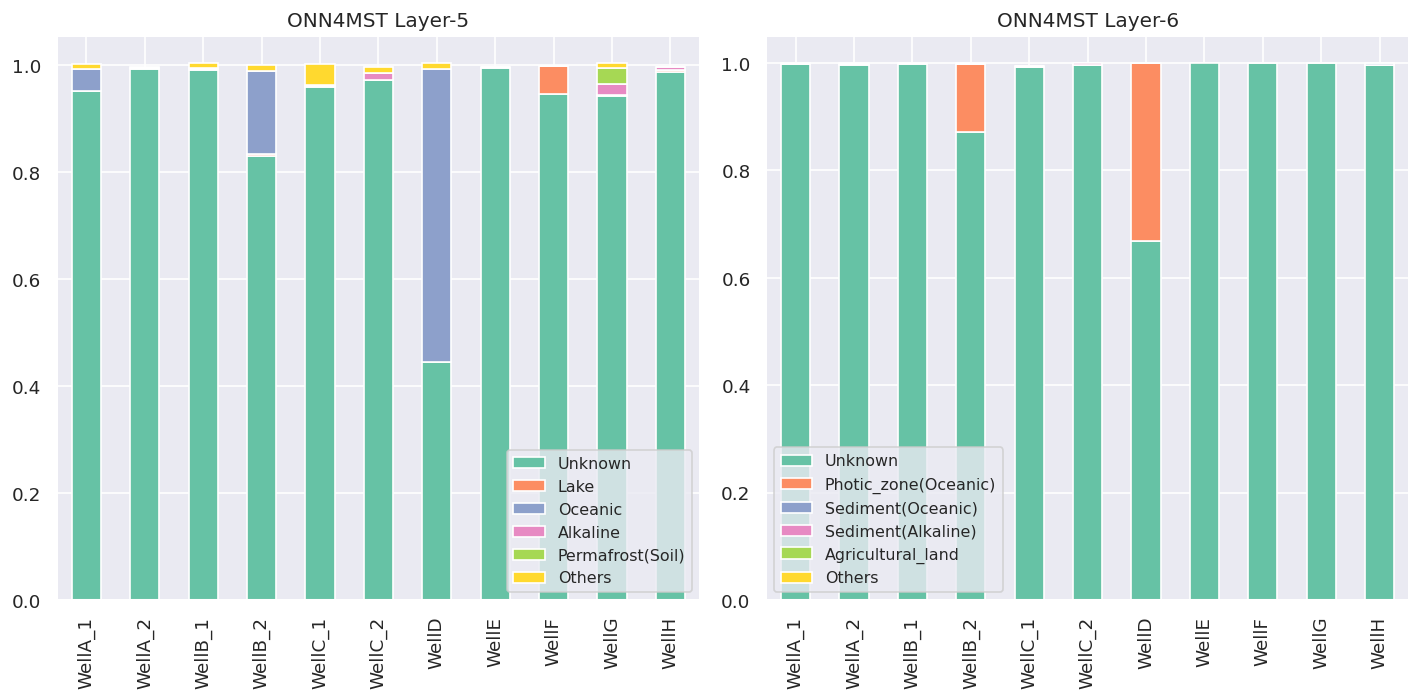

In [196]:
fig, (ax1, ax2) = plt.subplots(1, 2, dpi=120, figsize=(12, 6))
handles, labels = ([], [])

dfs['layer5'].plot(kind='bar', stacked=T, legend=F, ax=ax1, title='ONN4MST Layer-5')
#ax2.grid(b=None); ax2.set_xticks([]); ax2.set_yticks([]); ax2.set_facecolor('white')
dfs['layer6'].plot(kind='bar', stacked=T, legend=F, ax=ax2, title='ONN4MST Layer-6')
for ax in [ax1, ax2]: 
    ax.set(xlabel="", ylabel="")
    #ax.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1, fontsize=6.2)
    handles_labels = ax.get_legend_handles_labels()
    handles+= handles_labels[0] 
    labels+= handles_labels[1]
'''fig.legend(handles, labels, loc='upper center', ncol=2, fontsize=9.5, bbox_to_anchor=(0.5, 0.9), 
           facecolor='white', edgecolor='white')'''
ax1.legend(loc='lower right', fontsize=9.5)
ax2.legend(loc='lower left', fontsize=9.5)
plt.tight_layout()
plt.savefig('PollutionSourceTracking_supp.pdf')
plt.savefig('PollutionSourceTracking_supp.svg')